<a href="https://colab.research.google.com/github/TurchinskiyD/Retail_E-commerce_Sales_Analysis/blob/main/Retail_E_commerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Підключення до google drive
from google.colab import drive
drive.mount("/content/drive")

# Перехід в робочу папку
%cd /content/drive/MyDrive/Data_Analysis/Retail_E-commerce/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data_Analysis/Retail_E-commerce
countries.csv  events.csv  merged_sales_dataset.csv  products.csv


##**1. Data overview**

###*1.1 Датасет products*

In [74]:

# Завантаження датасету products
products_df = pd.read_csv('products.csv')
products_df.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


####**Опис таблиці**
Таблиця вимірів `products.csv`- в якій зберігаються дані про категорії продаваних товарів
####Колонки:
- id — унікальний код товару
- item_type — категорія товару (Cereal, Household, Clothes, …)



###*1.2 Датасет countries*

In [75]:
# Завантаження датасету countries
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


####**Опис таблиці**
Таблиця вимірів `products.csv`- в якій зберігаються дані про країни в яких відбувалися продажі.
####Колонки:
- name — назва країни
- alpha-2 — 2-літерний код країни (ISO)
- alpha-3 — 3-літерний код країни (ISO)
- region — макрорегіон (наприклад, Europe, Asia, Africa)
- sub-region — підрегіон (наприклад, Southern Asia, Northern Europe)

###*1.3 Датасет events*

In [76]:
# Завантаження датасету events
events_df = pd.read_csv('events.csv')
events_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


####**Опис таблиці**
Таблиця подій `events.csv`- в якій зберігаються інформація про замовлення компанії
####Колонки:
- Order ID — унікальний ідентифікатор замовлення
- Order Date — дата оформлення
- Ship Date — дата відвантаження
- Order Priority — пріоритет замовлення (L, M, H, C → Low, Medium, High, Critical)
- Country Code — код країни - ключове поле для зєднання з таблицею `countries.csv` за колонкою **alpha-3**
- Product ID — код товару - ключове поле для зєднання з таблицею `products.csv` за колонкою **id**
- Sales Channel — канал продажів (Online, Offline)
- Units Sold — кількість проданих одиниць
- Unit Price — ціна за одиницю
- Unit Cost — собівартість одиниці

##**2. Data cleaning**
Робота із пропущеними даними, некоректними даними, аномаліями.

###*2.1 Датасет products*

In [77]:
# Перевіримо наявність прошущених значень
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [78]:
# Перевіримо наявність некоректних значень
products_df['item_type'].unique()

array(['Cereal', 'Household', 'Clothes', 'Beverages', 'Office Supplies',
       'Fruits', 'Vegetables', 'Baby Food', 'Meat', 'Cosmetics', 'Snacks',
       'Personal Care'], dtype=object)

Таблиця `products.csv` аномалій, пропущених значень чи некоректних даних немає

###*2.2 Датасет countries*

In [79]:
# Перевіримо наявність прошущених значень
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [80]:
countries_df[countries_df.isnull().any(axis=1)]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


In [81]:
# Заповнимо пропущені дані для Antarctica
countries_df.loc[countries_df["alpha-3"] == "ATA", ["region", "sub-region"]] = ["Polar", "Antarctica"]

# Заповнимо пропущені дані для Namibia
countries_df.loc[countries_df["alpha-3"] == "NAM", "alpha-2"] = "NA"


In [82]:
countries_df[countries_df["alpha-3"].isin(["NAM", "ATA"])]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,Polar,Antarctica
153,Namibia,NA,NAM,Africa,Sub-Saharan Africa


- Джерело даних для Antarctica - [Wikipedia](https://uk.wikipedia.org/wiki/%D0%90%D0%BD%D1%82%D0%B0%D1%80%D0%BA%D1%82%D0%B8%D0%BA%D0%B0)

- Джерело даних для Namibia - [Wikipedia](https://uk.wikipedia.org/wiki/ISO_3166-1)

In [83]:
print(countries_df.shape[0])
print(countries_df.drop_duplicates().shape[0])


249
249


Датафрейм `countries` дублікатів не має

###*2.3 Датасет events*

In [84]:
events_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [85]:
print(events_df.info())
print(events_df.isna().sum() / events_df.shape[0] * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
None
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64

In [86]:
events_df['Units Sold'].describe()

,Units Sold
count,1328.000000
mean,4952.201807
std,2905.198996
min,2.000000
25%,2356.750000
50%,4962.000000
75%,7459.500000
max,9999.000000


Маємо пропуски в двох колонках **Country Code** - 6.16% значень, та **Units Sold** - 0.15%.

Враховуючи дуже малу кількість пропусків Units Sold заповнимо **серднім значенням** для цієї колонки (в даному датасеті середнє та медіанне дуже близько одне до одного 4952 та 4962 одиниць).

Щодо коду країни хоча 6.16% це є дуже суттєво, окрім Country Code ніякої іншої інформації в таблиці events про належність замовлення до тієї іншої країни ми не маємо, тож ці значення залишаються невідомими "**Unknown**".

In [87]:
# Заповнимо пропущені дані для Units Sold
events_df['Units Sold'] = events_df['Units Sold'].fillna(events_df["Units Sold"].median())

# Заповнимо пропущені дані для Country Code
events_df["Country Code"] = events_df["Country Code"].fillna("UNK")


In [88]:
print(events_df.isna().sum() / events_df.shape[0] * 100)

Order ID          0.0
Order Date        0.0
Ship Date         0.0
Order Priority    0.0
Country Code      0.0
Product ID        0.0
Sales Channel     0.0
Units Sold        0.0
Unit Price        0.0
Unit Cost         0.0
dtype: float64


In [89]:
events_df[events_df['Country Code'] == "UNK"].head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
2,101025998,7/18/2014,8/11/2014,M,UNK,7940,Online,4693.0,668.27,502.54
13,104548490,1/1/2014,1/5/2014,M,UNK,7331,Online,7076.0,255.28,159.42
26,117929494,1/24/2015,3/2/2015,H,UNK,4594,Offline,6813.0,9.33,6.92
29,118859469,6/2/2011,7/1/2011,L,UNK,8969,Offline,2013.0,152.58,97.44
43,126948583,5/24/2017,7/9/2017,C,UNK,7331,Online,5762.0,255.28,159.42


In [90]:
#Додамо запис до countries_df
new_country = {
    "name": "Unknown",
    "alpha-2": "XX",
    "alpha-3": "UNK",
    "region": "Unknown",
    "sub-region": "Unknown"
}

new_country_df = pd.DataFrame([new_country])
countries_df = pd.concat([countries_df, new_country_df], ignore_index=True)

countries_df.tail()

,name,alpha-2,alpha-3,region,sub-region
245,Western Sahara,EH,ESH,Africa,Northern Africa
246,Yemen,YE,YEM,Asia,Western Asia
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa
248,Zimbabwe,ZW,ZWE,Africa,Sub-Saharan Africa
249,Unknown,XX,UNK,Unknown,Unknown


В подальшому при аналізі в розрізі країн чи регіонів  матимемо заповнене значення "Unknown"

In [91]:
# Перевіримо на наявність дублікатів
duplicate_rows = events_df.duplicated()
duplicate_rows.sum()

np.int64(0)

Дублікатів немає

Перевіримо відповідність типів колонок до внесених даних

In [92]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


Колонки `Ship Date` та `Order Date` мають тип **object** їх потрібно перетворити на **datetime**. Решта колонок мають підходящий формат

In [93]:

# Подивимось перші 10 унікальних дат
print(events_df['Order Date'].unique()[:10])
print(events_df['Ship Date'].unique()[:10])



['10/8/2014' '8/11/2016' '7/18/2014' '5/13/2017' '8/11/2012' '3/15/2015'
 '4/20/2013' '11/12/2011' '9/19/2012' '1/23/2011']
['10/18/2014' '8/11/2016' '8/11/2014' '6/13/2017' '9/18/2012' '4/18/2015'
 '6/6/2013' '12/14/2011' '10/20/2012' '2/22/2011']


In [94]:
# Перевіримо чи є значення > 12 для першої частини дати
def check_date_format(series):
    first_parts = [d.split('/')[0] for d in series.dropna()]
    first_parts = [int(x) for x in first_parts if x.isdigit()]
    over_12 = [x for x in first_parts if x > 12]
    if over_12:
        print(f"Є значення '> 12' у першій частині дати: {set(over_12)} - формат DD/MM/YYYY")
    else:
        print("Немає значень '> 12' у першій частині дати: - формат MM/DD/YYYY")

# Перевірка для колонок
check_date_format(events_df['Order Date'])
check_date_format(events_df['Ship Date'])


Немає значень '> 12' у першій частині дати: - формат MM/DD/YYYY
Немає значень '> 12' у першій частині дати: - формат MM/DD/YYYY


In [95]:
# Перетворимо колонки 'Order Date' та	'Ship Date' на datetime
events_df['Order Date'] = pd.to_datetime(events_df['Order Date'], format='%m/%d/%Y')

events_df['Ship Date'] = pd.to_datetime(events_df['Ship Date'], format='%m/%d/%Y')

In [96]:
events_df[['Order Date', 'Ship Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1330 non-null   datetime64[ns]
 1   Ship Date   1330 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 20.9 KB


Перевіримо датасет на аномалії та коректність внесених даних

In [97]:
events_df[['Units Sold', 'Unit Cost', 'Unit Price']].describe()

,Units Sold,Unit Cost,Unit Price
count,1330.000000,1330.000000,1330.000000
mean,4952.216541,187.246812,264.893541
std,2903.012194,176.158873,217.323460
min,2.000000,6.920000,9.330000
25%,2360.750000,35.840000,81.730000
50%,4962.000000,97.440000,154.060000
75%,7458.750000,263.330000,437.200000
max,9999.000000,524.960000,668.270000


Якщо для `Units Sold` середнє та медіанне значення майже однакове то для `Unit Cost` та `Unit Price` середне значення значно більше ніж медіана.

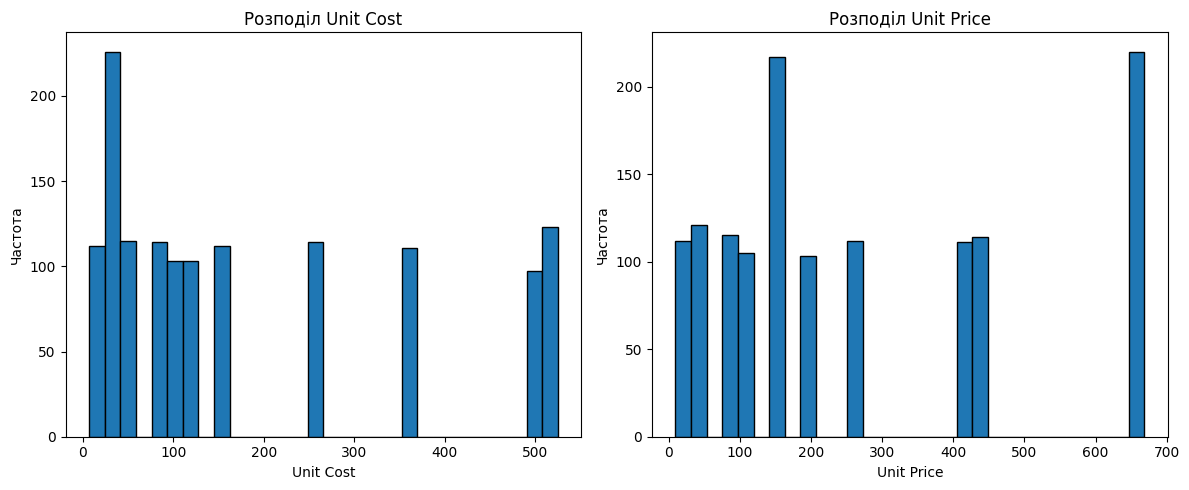

In [98]:
import matplotlib.pyplot as plt

# Побудуємо гістограми для Unit Cost та Unit Price
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гістограма Unit Cost
axes[0].hist(events_df['Unit Cost'], bins=30, edgecolor='black')
axes[0].set_title('Розподіл Unit Cost')
axes[0].set_xlabel('Unit Cost')
axes[0].set_ylabel('Частота')

# Гістограма Unit Price
axes[1].hist(events_df['Unit Price'], bins=30, edgecolor='black')
axes[1].set_title('Розподіл Unit Price')
axes[1].set_xlabel('Unit Price')
axes[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()



Маємо суттеві викиди, але враховуючи, що таких значень досить багато, а також що компанія працює з 12-ти категоріями товарів можна зробити попердній висновок, що це не аномальні значення - компанія займає різні цінові сегменти на ринку.

Перевіримо колонки на некоректні дані

In [99]:
print(events_df['Order Priority'].unique())
print(events_df['Sales Channel'].unique())
print(events_df['Country Code'].unique())

['M' 'C' 'L' 'H' ' C' 'M ']
['Online' 'Offline' 'online']
['NOR' 'SRB' 'UNK' 'MNE' 'SVK' 'FRA' 'ESP' 'HRV' 'DEU' 'ARM' 'GEO' 'GBR'
 'SVN' 'ROU' 'POL' 'LUX' 'CYP' 'BEL' 'LTU' 'RUS' 'MLT' 'UKR' 'CZE' 'PRT'
 'BLR' 'EST' 'AUT' 'MKD' 'SMR' 'NLD' 'CHE' 'HUN' 'LVA' 'BGR' 'ITA' 'IRL'
 'AND' 'LIE' 'FIN' 'ALB' 'SWE' 'BIH' 'DNK' 'MCO' 'ISL' 'GRC']


In [100]:
# Прибираємо пробіли та зводимо до необхідного регістру
events_df['Order Priority'] = events_df['Order Priority'].str.strip().str.upper()

events_df['Sales Channel'] = events_df['Sales Channel'].str.strip().str.capitalize()

events_df['Country Code'] = events_df['Country Code'].str.strip().str.upper()

In [101]:
print(events_df['Order Priority'].unique())
print(events_df['Sales Channel'].unique())
print(events_df['Country Code'].unique())

['M' 'C' 'L' 'H']
['Online' 'Offline']
['NOR' 'SRB' 'UNK' 'MNE' 'SVK' 'FRA' 'ESP' 'HRV' 'DEU' 'ARM' 'GEO' 'GBR'
 'SVN' 'ROU' 'POL' 'LUX' 'CYP' 'BEL' 'LTU' 'RUS' 'MLT' 'UKR' 'CZE' 'PRT'
 'BLR' 'EST' 'AUT' 'MKD' 'SMR' 'NLD' 'CHE' 'HUN' 'LVA' 'BGR' 'ITA' 'IRL'
 'AND' 'LIE' 'FIN' 'ALB' 'SWE' 'BIH' 'DNK' 'MCO' 'ISL' 'GRC']


Створимо колонки `Revenue`, `Cost`, `Profit`, `Markup` необхідні для подальшого аналізу

In [102]:
# Дохід
events_df['Revenue'] = events_df['Units Sold'] * events_df['Unit Price']

# Собівартість
events_df['Cost'] = events_df['Units Sold'] * events_df['Unit Cost']

# Прибуток
events_df['Profit'] = events_df['Revenue'] - events_df['Cost']

# Націнка (%)
events_df['Markup'] = ((events_df['Unit Price'] - events_df['Unit Cost']) / events_df['Unit Cost']) * 100
events_df['Markup'] = events_df['Markup'].round(1)

events_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50,75.6
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87,75.6
2,101025998,2014-07-18,2014-08-11,M,UNK,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89,33.0
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24,204.9
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68,49.3


Розрахуємо термін доставки для кожного замовлення та внесемо ці дані в окрему колонку

In [103]:
events_df['Shipping Time'] = (events_df['Ship Date'] - events_df['Order Date']).dt.days
events_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50,75.6,10
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87,75.6,0
2,101025998,2014-07-18,2014-08-11,M,UNK,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89,33.0,24
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24,204.9,31
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68,49.3,38


In [104]:
events_df['Shipping Time'].describe()

,Shipping Time
count,1330.000000
mean,24.775940
std,14.577915
min,0.000000
25%,12.000000
50%,25.000000
75%,37.000000
max,50.000000


Доставка від 0 (видача в день замовлення) до 50 днів. Середне 24.7 медіана 25 отже аномалій чи викидів не маємо

Визначемо в який день тижня було здійсненно замовлення

In [105]:

events_df['Order DayName'] = events_df['Order Date'].dt.day_name()
events_df['Order DayName'].unique()


array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

Визначимо в який рік і місяць було замовлення

In [106]:
events_df['YearQuarter'] = events_df['Order Date'].dt.to_period('Q') \
                            .astype(str).str.replace('Q', '-Q')
events_df.head(2)


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.7,117.11,133705.0,76121.50,57583.50,75.6,10,Wednesday,2014-Q4
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.7,117.11,409960.1,233400.23,176559.87,75.6,0,Thursday,2016-Q3


Обєднаємо 3 датасети в 1 та приберемо зайві поля


In [107]:
events_df.head(1)


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.7,117.11,133705.0,76121.5,57583.5,75.6,10,Wednesday,2014-Q4


In [108]:
products_df.head(1)

,id,item_type
0,2103,Cereal


In [109]:
countries_df.head(1)

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia


In [110]:

merged_df = events_df.merge(products_df, left_on='Product ID', right_on='id', how='left')
merged_df.head(2)


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter,id,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.7,117.11,133705.0,76121.50,57583.50,75.6,10,Wednesday,2014-Q4,2103,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.7,117.11,409960.1,233400.23,176559.87,75.6,0,Thursday,2016-Q3,2103,Cereal


In [111]:

merged_df = merged_df.merge(countries_df, left_on='Country Code', right_on='alpha-3', how='left')
merged_df.head(2)


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,...,Shipping Time,Order DayName,YearQuarter,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.7,117.11,...,10,Wednesday,2014-Q4,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.7,117.11,...,0,Thursday,2016-Q3,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe


Видалимо непотрібні колонки, та перейменуємо деякі щоб назви колонок були в одному форматі

In [112]:

merged_df = merged_df.drop(
    columns=['Ship Date', 'Order Priority', 'Country Code', 'Product ID',
             'id', 'alpha-2', 'alpha-3', 'sub-region']
    )
merged_df.head(2)

,Order ID,Order Date,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter,item_type,name,region
0,100640618,2014-10-08,Online,650.0,205.7,117.11,133705.0,76121.50,57583.50,75.6,10,Wednesday,2014-Q4,Cereal,Norway,Europe
1,100983083,2016-08-11,Offline,1993.0,205.7,117.11,409960.1,233400.23,176559.87,75.6,0,Thursday,2016-Q3,Cereal,Serbia,Europe


In [113]:
merged_df = merged_df.rename(columns={
    "item_type": "Product Category",
    "name": "Country",
    "region": "Region"
})
merged_df.head(2)

,Order ID,Order Date,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter,Product Category,Country,Region
0,100640618,2014-10-08,Online,650.0,205.7,117.11,133705.0,76121.50,57583.50,75.6,10,Wednesday,2014-Q4,Cereal,Norway,Europe
1,100983083,2016-08-11,Offline,1993.0,205.7,117.11,409960.1,233400.23,176559.87,75.6,0,Thursday,2016-Q3,Cereal,Serbia,Europe


Збережемо очищений датасет в файл

In [114]:

merged_df.to_csv('merged_sales_dataset.csv', index=False, encoding="utf-8", mode='w')


##**3. Data analysis and visualization**


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Підключення до google drive
from google.colab import drive
drive.mount("/content/drive")

# Перехід в робочу папку
%cd /content/drive/MyDrive/Data_Analysis/Retail_E-commerce/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data_Analysis/Retail_E-commerce


In [116]:
# Завантаження датасету
sales_df = pd.read_csv('merged_sales_dataset.csv')
sales_df.head()

,Order ID,Order Date,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter,Product Category,Country,Region
0,100640618,2014-10-08,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50,75.6,10,Wednesday,2014-Q4,Cereal,Norway,Europe
1,100983083,2016-08-11,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87,75.6,0,Thursday,2016-Q3,Cereal,Serbia,Europe
2,101025998,2014-07-18,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89,33.0,24,Friday,2014-Q3,Household,Unknown,Unknown
3,102230632,2017-05-13,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24,204.9,31,Saturday,2017-Q2,Clothes,Montenegro,Europe
4,103435266,2012-08-11,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68,49.3,38,Saturday,2012-Q3,Beverages,Serbia,Europe


In [117]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1330 non-null   int64  
 1   Order Date        1330 non-null   object 
 2   Sales Channel     1330 non-null   object 
 3   Units Sold        1330 non-null   float64
 4   Unit Price        1330 non-null   float64
 5   Unit Cost         1330 non-null   float64
 6   Revenue           1330 non-null   float64
 7   Cost              1330 non-null   float64
 8   Profit            1330 non-null   float64
 9   Markup            1330 non-null   float64
 10  Shipping Time     1330 non-null   int64  
 11  Order DayName     1330 non-null   object 
 12  YearQuarter       1330 non-null   object 
 13  Product Category  1330 non-null   object 
 14  Country           1330 non-null   object 
 15  Region            1330 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory 

###**Ключові метрики діяльності компанії**

In [118]:

# Основні метрики
total_orders = sales_df['Order ID'].count()
total_revenue = sales_df['Revenue'].sum().round()
total_cost = sales_df['Cost'].sum().round()
total_profit = sales_df['Profit'].sum().round()
max_order = sales_df['Revenue'].max()

# Географічні метрики
unique_countries = sales_df['Country'].nunique()
top_countries_profit = sales_df.groupby('Country')['Profit'].sum() \
                          .round().sort_values(ascending=False).head(6)

# Продуктові метрики
unique_categories = sales_df['Product Category'].nunique()
top_categories_profit = sales_df.groupby('Product Category')['Profit'].sum() \
                        .round().sort_values(ascending=False).head(5)

# Фінансові
avg_markup = sales_df['Markup'].mean().round(1)

# Операційні
avg_shipping_time = sales_df['Shipping Time'].mean()
sales_channel_distribution = sales_df['Sales Channel'].value_counts(normalize=True) * 100
top_day = sales_df['Order DayName'].value_counts().idxmax()


In [119]:
# --- Вивід ---
print("📊 Основні метрики")
print(f"Загальна кількість замовлень: {total_orders:,}")
print(f"Загальний дохід: {total_revenue:,.2f}")
print(f"Загальна собівартість: {total_cost:,.2f}")
print(f"Загальний прибуток: {total_profit:,.2f}")
print(f"Найбільше за об'ємом замовлення: {max_order:,.2f}\n")

print("🌍 Географія")
print(f"Кількість унікальних країн: {unique_countries}")
print("ТОП-5 країн за прибутком:")
print(top_countries_profit, "\n")

print("📦 Продукти")
print(f"Кількість категорій товарів: {unique_categories}")
print("ТОП-5 категорій за прибутком (Profit):")
print(top_categories_profit, "\n")

print("📈 Фінанси")
print(f"Середня націнка: {avg_markup:.2f}% \n")

print("🚚 Операційні метрики")
print(f"Середній час доставки: {avg_shipping_time:.1f} днів")
print("Розподіл замовлень за каналами продажу (%):")
print(sales_channel_distribution, "\n")
print(f"Найбільш популярний день замовлень: {top_day}")

📊 Основні метрики
Загальна кількість замовлень: 1,330
Загальний дохід: 1,704,628,371.00
Загальна собівартість: 1,202,785,738.00
Загальний прибуток: 501,842,633.00
Найбільше за об'ємом замовлення: 6,672,675.95

🌍 Географія
Кількість унікальних країн: 46
ТОП-5 країн за прибутком:
Country
Unknown       27725424.0
Andorra       15410037.0
Ukraine       14804926.0
Malta         14610128.0
San Marino    13792993.0
Hungary       13786231.0
Name: Profit, dtype: float64 

📦 Продукти
Кількість категорій товарів: 12
ТОП-5 категорій за прибутком (Profit):
Product Category
Cosmetics          92723306.0
Office Supplies    77977176.0
Household          72962467.0
Baby Food          53940997.0
Clothes            43431314.0
Name: Profit, dtype: float64 

📈 Фінанси
Середня націнка: 60.30% 

🚚 Операційні метрики
Середній час доставки: 24.8 днів
Розподіл замовлень за каналами продажу (%):
Sales Channel
Offline    50.150376
Online     49.849624
Name: proportion, dtype: float64 

Найбільш популярний день за

###**Аналіз продажів**


####*Продажі в розрізі категорій товарів*

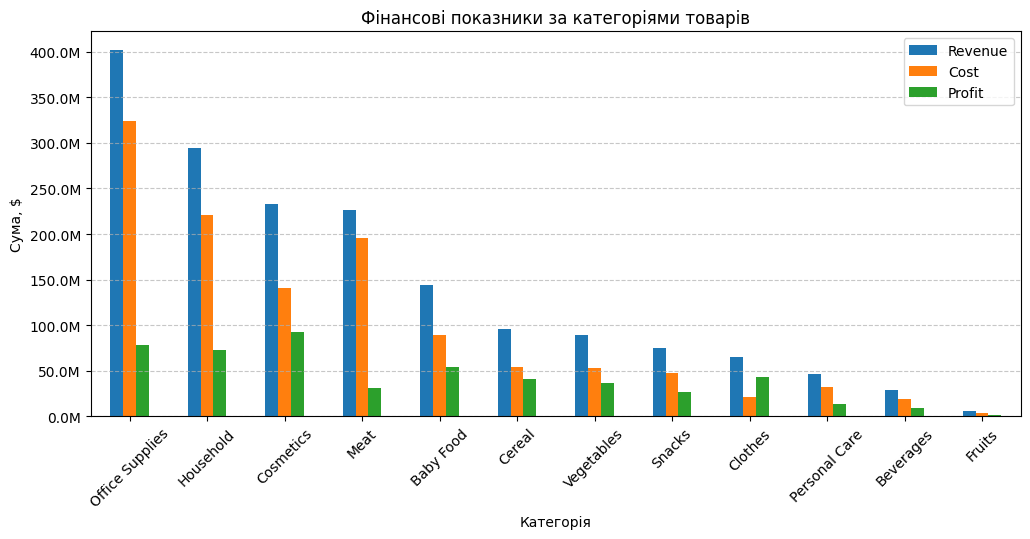

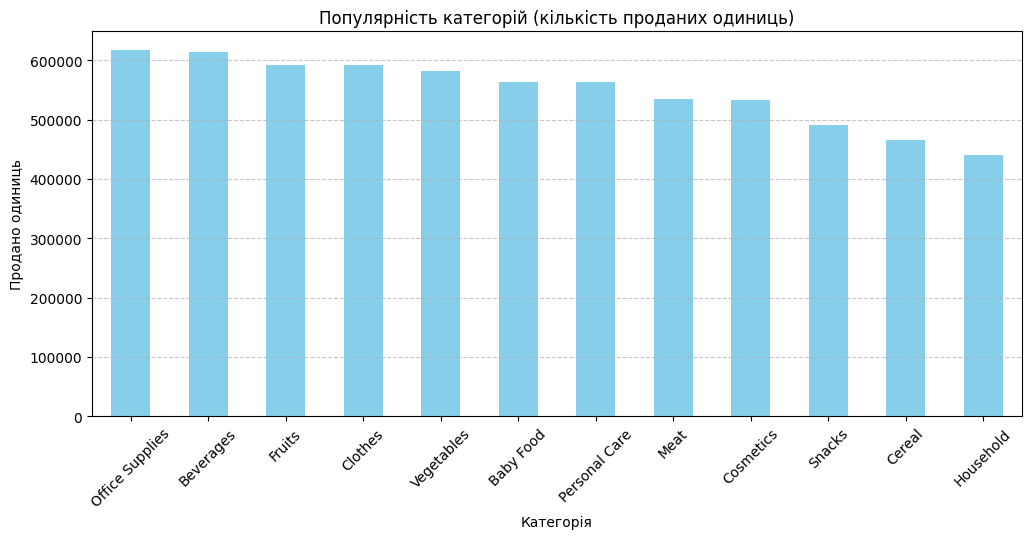

In [120]:
import matplotlib.ticker as ticker

# Групування
category_stats = sales_df.groupby('Product Category')[['Revenue', 'Cost', 'Profit']] \
                .sum().sort_values('Revenue', ascending=False)

# Візуалізація доходів, витрат і прибутків
ax = category_stats.plot(kind="bar", figsize=(12,5))
plt.title('Фінансові показники за категоріями товарів')
plt.xlabel('Категорія')
plt.ylabel('Сума, $')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# формування млн $
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.show()

# Популярність (кількість проданих одиниць)
units_by_category = sales_df.groupby('Product Category')['Units Sold'].sum() \
                    .sort_values(ascending=False)

units_by_category.plot(kind='bar', figsize=(12,5), color='skyblue')
plt.title('Популярність категорій (кількість проданих одиниць)')
plt.ylabel('Продано одиниць')
plt.xlabel('Категорія')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


####*Продажі в розрізі географії.*

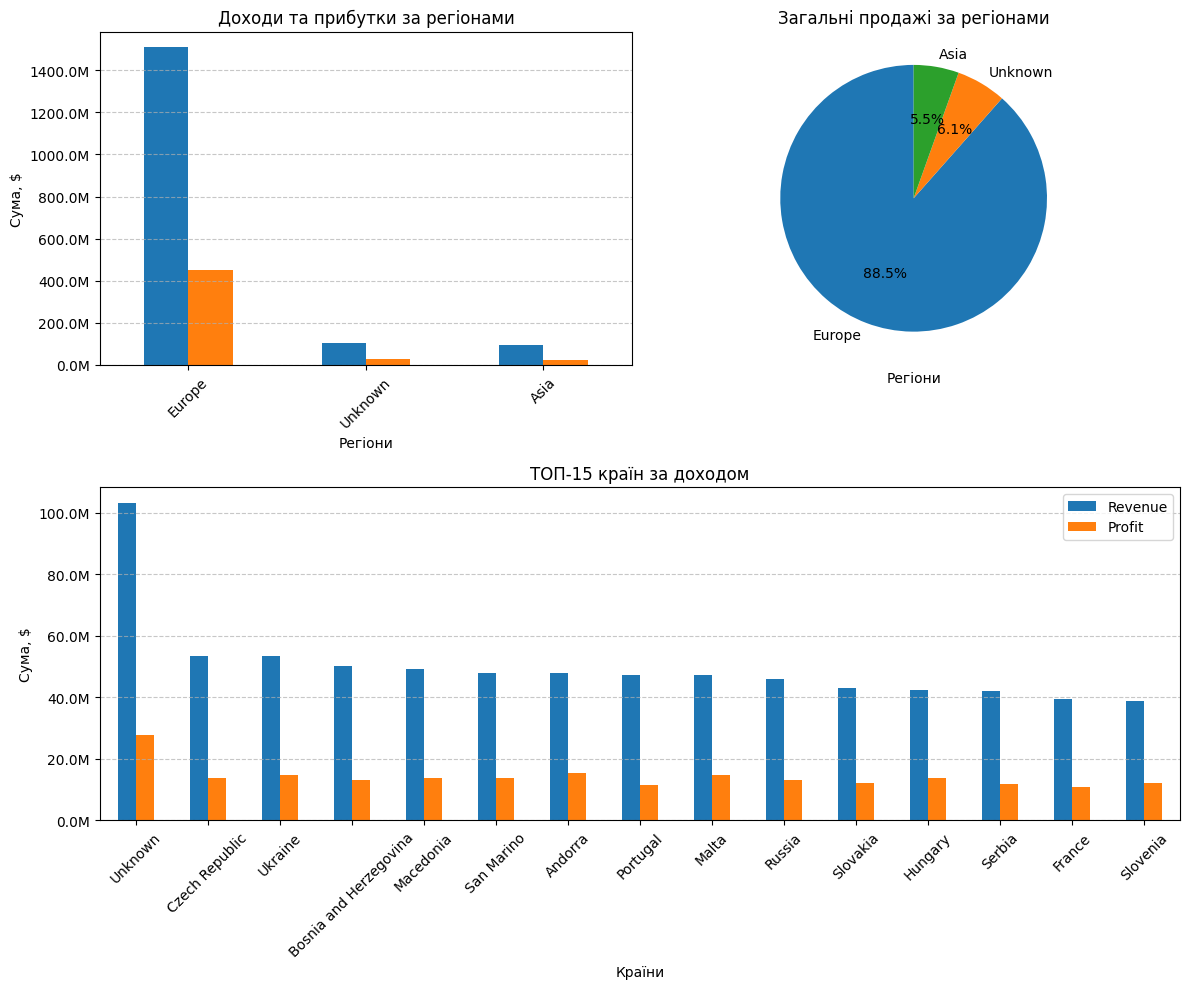

In [121]:

# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# fig.delaxes(axes[1,1])

fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0,0])   # верхній лівий
ax2 = fig.add_subplot(gs[0,1])   # верхній правий
ax3 = fig.add_subplot(gs[1,:])   # нижній, розтягнутий на 2 колонки


# Доходи за регіонами
region_stats = sales_df.groupby('Region')[['Revenue', 'Profit']].sum() \
              .sort_values('Revenue', ascending=False)

ax1 = region_stats.plot(kind='bar', ax=ax1, legend=False)
ax1.set_title('Доходи та прибутки за регіонами')
ax1.set_xlabel('Регіони')
ax1.set_ylabel('Сума, $')
# формування млн $
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)


# Загальні продажі за регіонами
region_stats['Revenue'].plot(
    kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90
    )
ax2.set_title('Загальні продажі за регіонами')
ax2.set_xlabel('Регіони')
ax2.set_ylabel('')


# Доходи за країнами (топ-10)
country_stats = sales_df.groupby('Country')[['Revenue', 'Profit']].sum(). \
                sort_values('Revenue', ascending=False).head(15)

ax3 = country_stats.plot(kind='bar', ax=ax3)
ax3.set_title('ТОП-15 країн за доходом')
ax3.set_xlabel('Країни')
ax3.set_ylabel('Сума, $')
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


####*Продажі в розрізі каналів продажу.*

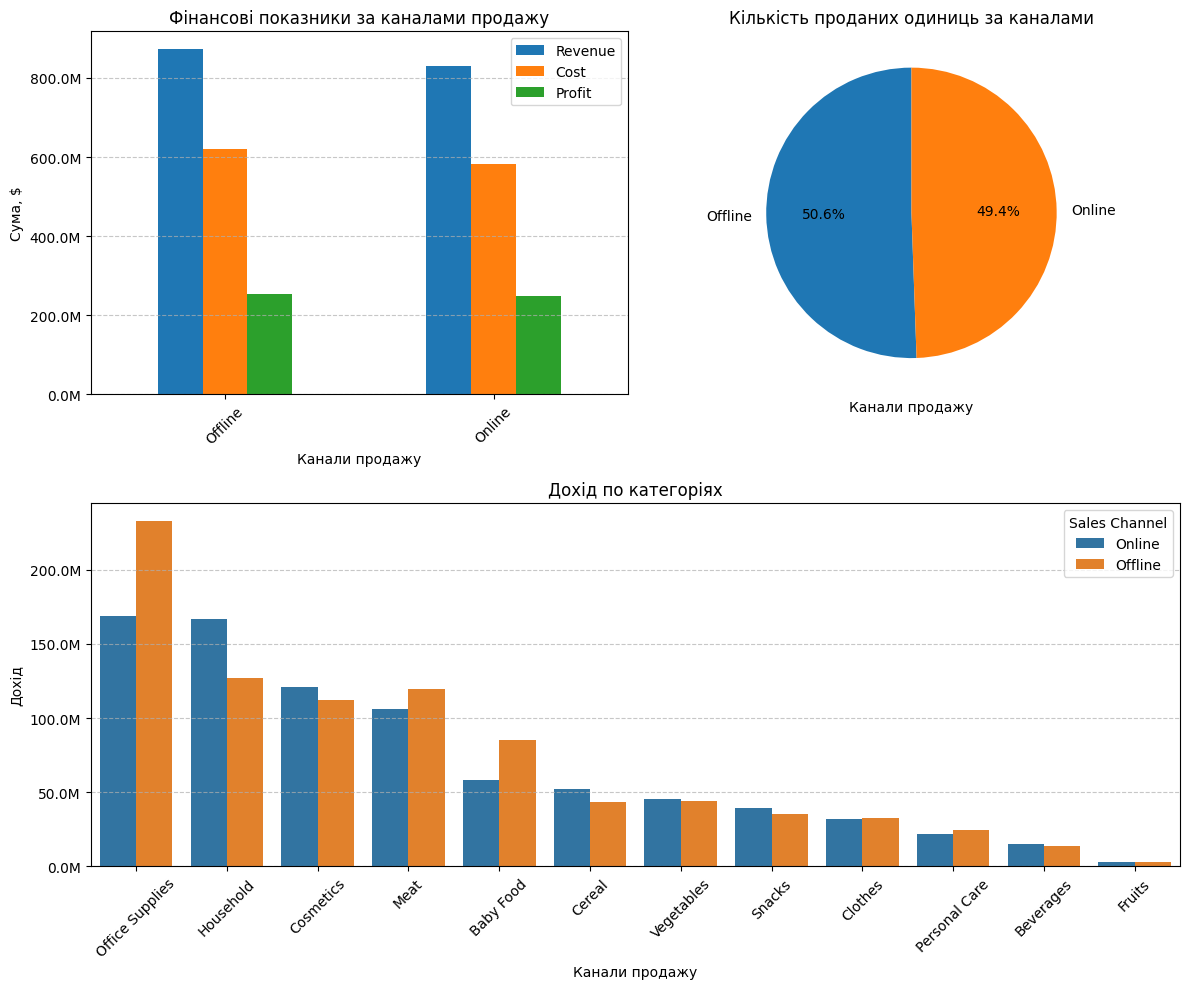

In [122]:

fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,:])


# Основні метрики по каналам
channel_stats = sales_df.groupby("Sales Channel")[["Revenue", "Cost", "Profit"]].sum()

channel_stats.plot(kind="bar", ax=ax1)
ax1.set_title("Фінансові показники за каналами продажу")
ax1.set_xlabel('Канали продажу')
ax1.set_ylabel("Сума, $")
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)


# Кількість проданих одиниць по каналам
units_by_channel = sales_df.groupby("Sales Channel")["Units Sold"].sum()
units_by_channel.plot(
    kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90
    )
ax2.set_title("Кількість проданих одиниць за каналами")
ax2.set_xlabel('Канали продажу')
ax2.set_ylabel("")


# Дохід по категоріях в розрізі каналів продажу

order = sales_df.groupby('Product Category')['Revenue'].sum() \
        .sort_values(ascending=False).index


ax3 = sns.barplot(
    data=sales_df, ax=ax3,
    x='Product Category', y="Revenue", hue="Sales Channel", estimator="sum",
    errorbar=None, order=order
)
ax3.set_title("Дохід по категоріях")
ax3.set_xlabel('Канали продажу')
ax3.set_ylabel("Дохід")
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##**Висновки**
***1. Географія продажів***
 - Європа генерує біля 90% доходів - компанія критично залежить від цього ринку - ризик від коливань економіки/політики.
- Азія та “Unknown” мають малі частки біля 12% разом.
- Серед ТОП-країн: Czech Republic, Ukraine, Bosnia and Herzegovina, Macedonia, San Marino, Andorra.
- Потрібна диверсифікація у нові ринки.
- Обов’язково необхідно усунути “Unknown” оскільки наразі 6% надходжен компанії не можуть бути ідентифікованими

***2. Категорії товарів***
- Лідери за доходами: Office Supplies, Household, Cosmetics, Meat. Середня група: Baby Food, Cereal, Vegetables.
- Найбільш вигідні: Office Supplies та Cosmetics.
Household і Meat приносять значний дохід, але мають нижчу рентабельність (високі витрати).
- Fruits і Beverages → високі обсяги, але низька маржа (товари масового попиту).
- Найбільше продається: Office Supplies, Beverages, Fruits, Clothes.
Household продається мало, але приносить великі гроші (висока ціна за одиницю).

***3. Канали продажу***

- Продажі розподілені майже порівну: 50.6% - Offline і 49.4% - Online.
- Online і Offline мають близькі обсяги доходу.
- Offline трохи випереджає за прибутком.

По категоріях:  
- Household, Office Supplies, Meat більше продаються офлайн.
- Cosmetics, Baby Food, Snacks — більш рівномірно розподілені.
- Деякі категорії краще розвиваються онлайн (наприклад, Personal Care).


###**Дослідження впливу інтервалу часу між замовленням та його відвантаженням**

In [123]:
sales_df.head(2)

,Order ID,Order Date,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter,Product Category,Country,Region
0,100640618,2014-10-08,Online,650.0,205.7,117.11,133705.0,76121.50,57583.50,75.6,10,Wednesday,2014-Q4,Cereal,Norway,Europe
1,100983083,2016-08-11,Offline,1993.0,205.7,117.11,409960.1,233400.23,176559.87,75.6,0,Thursday,2016-Q3,Cereal,Serbia,Europe


####*Аналіз в розрізі категорій товарів*

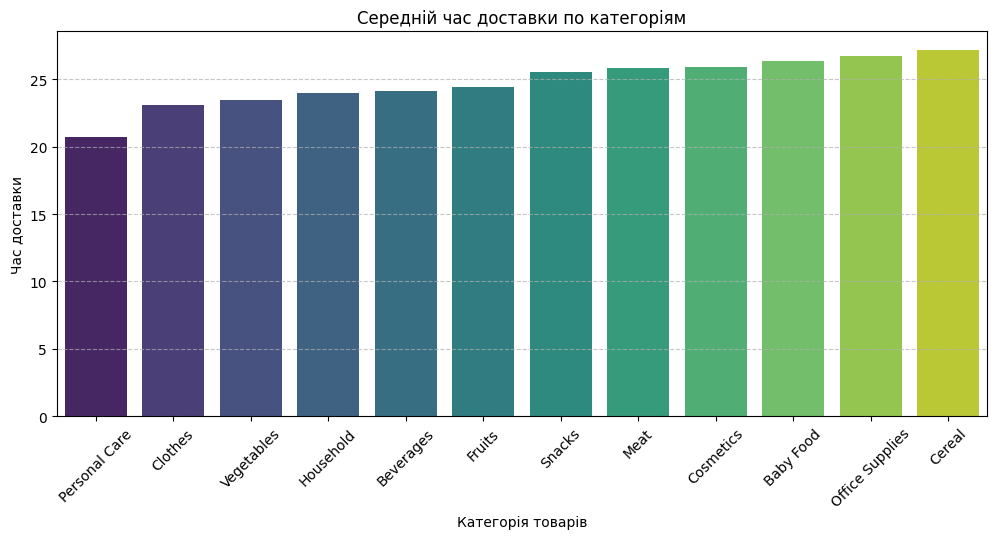

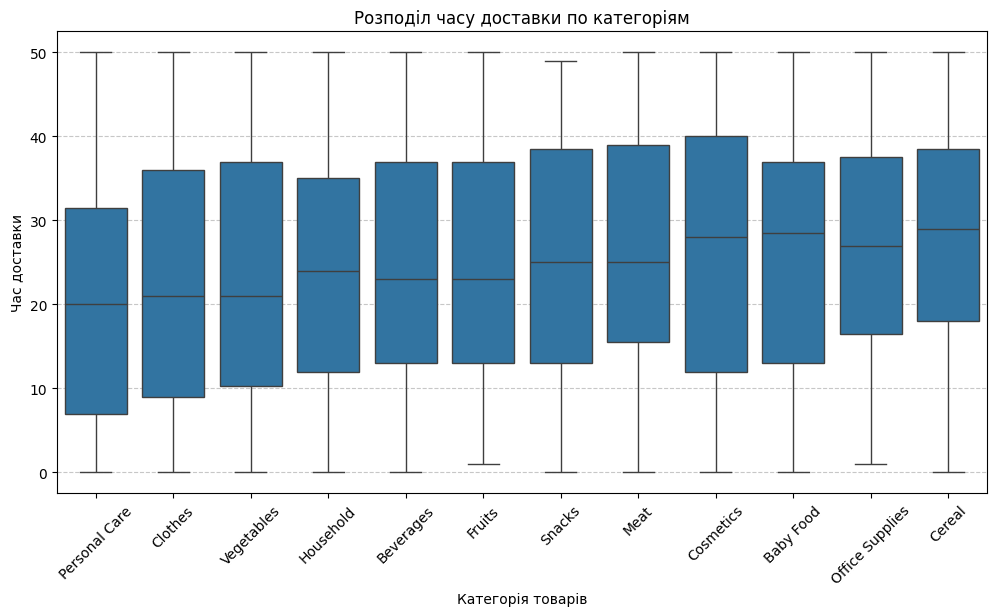

In [124]:
# Середній Shipping Time по категоріям
shipping_by_categoty = sales_df.groupby('Product Category')['Shipping Time'].mean() \
                        .sort_values(ascending=True).reset_index()


plt.figure(figsize=(12,5))
sns.barplot(data=shipping_by_categoty,
            x='Product Category',
            hue="Product Category",
            y='Shipping Time',
            palette='viridis',
            legend=False)
plt.title('Середній час доставки по категоріям')
plt.xlabel('Категорія товарів')
plt.ylabel('Час доставки')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


# Розподіл часу доставки по категоріям
plt.figure(figsize=(12,6))

order = sales_df.groupby('Product Category')['Shipping Time'].mean().sort_values().index

sns.boxplot(data=sales_df,
            x='Product Category',
            y='Shipping Time',
            order=order)
plt.title('Розподіл часу доставки по категоріям')
plt.xlabel('Категорія товарів')
plt.ylabel('Час доставки')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

####*Аналіз в розрізі країн*

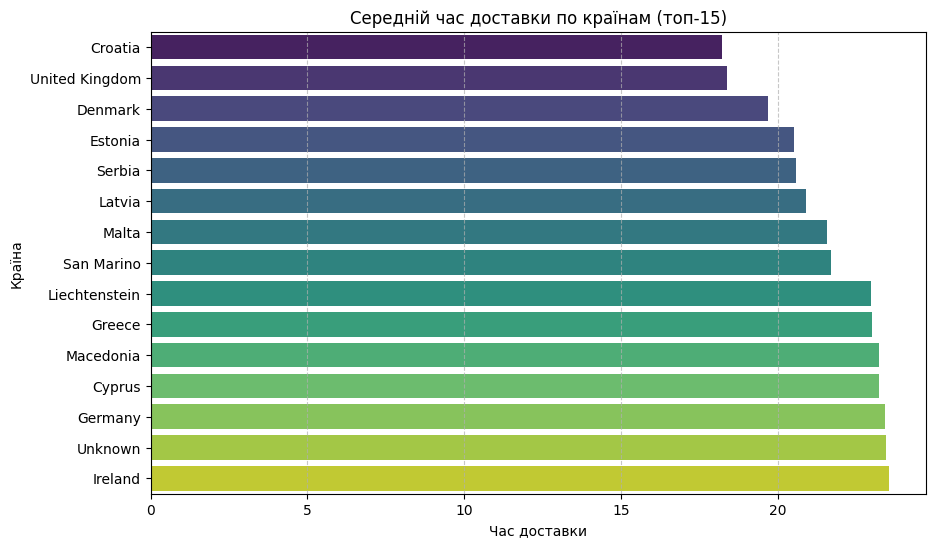

In [125]:
shipping_by_country = sales_df.groupby('Country')['Shipping Time'].mean().reset_index()

plt.figure(figsize=(10,6))
top_countries = shipping_by_country.sort_values("Shipping Time").head(15)
sns.barplot(data=top_countries,
            x='Shipping Time',
            hue='Country',
            y='Country',
            palette='viridis',
            legend=False)
plt.title('Середній час доставки по країнам (топ-15)')
plt.xlabel('Час доставки')
plt.ylabel('Країна')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


####*Аналіз в розрізі регіонів*

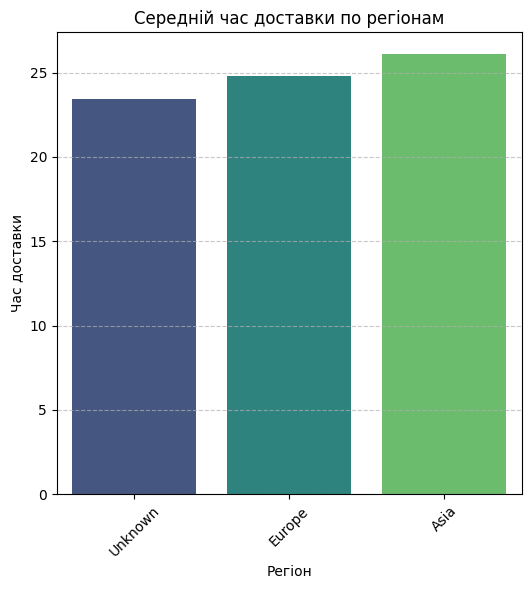

In [126]:
shipping_by_region = sales_df.groupby("Region")["Shipping Time"].mean() \
                      .sort_values(ascending=True).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data=shipping_by_region,
            x="Region",
            hue='Region',
            y="Shipping Time",
            palette="viridis",
            legend=False)
plt.title("Середній час доставки по регіонам")
plt.xlabel('Регіон')
plt.ylabel('Час доставки')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


####*Аналіз залежності прибуток від часу, необхідного на відвантаження товару*

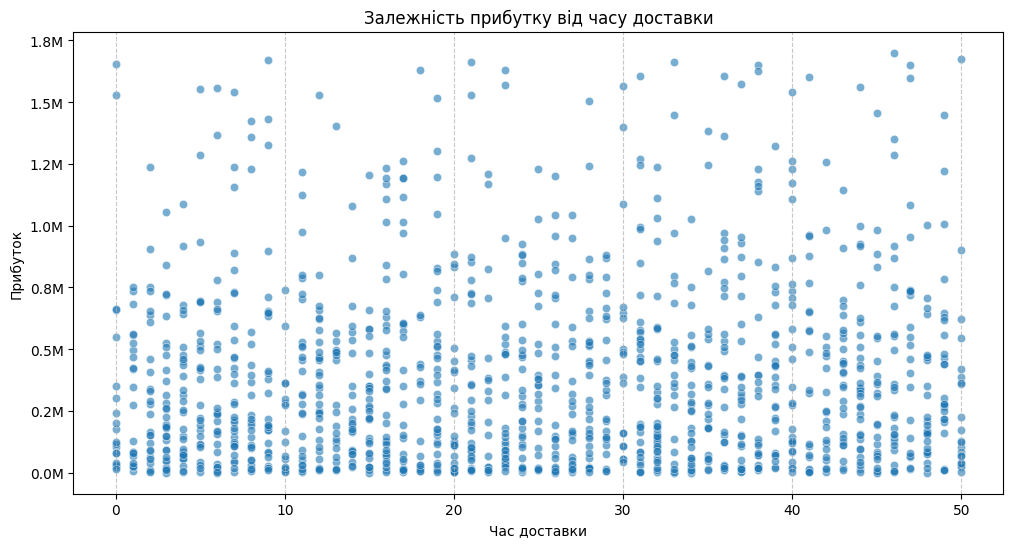

Кореляція між Shipping Time та Profit: 0.061


In [127]:
# час доставки vs прибуток
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=sales_df, x="Shipping Time", y="Profit", alpha=0.6)
plt.title("Залежність прибутку від часу доставки")
plt.xlabel('Час доставки')
plt.ylabel('Прибуток')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# кореляція
corr = sales_df["Shipping Time"].corr(sales_df["Profit"])
print(f"Кореляція між Shipping Time та Profit: {corr:.3f}")


##**Висновки**
 ***1. Час доставки по країнах***
- Найшвидші поставки спостерігаються у таких країнах, як Хорватія, Великобританія, Данія, Естонія, Сербія, Латвія - у середньому 18 - 21 днів.
- Трохи довше доставляють в — Ірландія, Німеччина, Кіпр, Македонія, Греція - у середньому 22–24 дні.
- Країни Західної Європи мають більший середній термін доставки, ніж Центральна/Південна Європа. Це може бути пов’язано з віддаленістю складів, логістичними маршрутами або митними процедурами.

***2. Час доставки по категоріям товарів***
- "Найшвидші" категорії: Personal Care - 21 день, Clothes - 23 дні, Vegetables 23.5 дні.
- "Найповільніші" категорії: Cereal, Office Supplies, Baby Food - 26 -27 днів.
- Boxplot показує, що в межах однієї категорії є велика варіативність від доставки в день замовлення до 50-ти днів.
- Отже товари повсякденного вжитку та швидкопсувні продукти (овочі, одяг, засоби гігієни) доставляються швидше, тоді як нехарчові та довготривалі товари (офісні, крупи, дитяче харчування) мають довший цикл поставки.

***3. Час доставки по регіонам***
- Європа – середній час близько 25 днів.
- Азія – трохи більше 26 днів.
- Отже географічний фактор важливий — чим далі від складу (імовірно Європа), тим довше триває доставка.

***4. Залежність прибутку від часу доставки***
- Scatter plot показує широкий розкид: є замовлення з високим прибутком як при дуже швидкій доставці 0–5 днів, так і при довготривалій >40 днів.
- Показник кореляції 0.061 - тож фактично лінійної залежності між прибутком і часом доставки немає.



###**Аналіз динаміки продажів (у часі)**


In [128]:
sales_df.head(2)

,Order ID,Order Date,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter,Product Category,Country,Region
0,100640618,2014-10-08,Online,650.0,205.7,117.11,133705.0,76121.50,57583.50,75.6,10,Wednesday,2014-Q4,Cereal,Norway,Europe
1,100983083,2016-08-11,Offline,1993.0,205.7,117.11,409960.1,233400.23,176559.87,75.6,0,Thursday,2016-Q3,Cereal,Serbia,Europe


####*Загальна динаміка продажів*

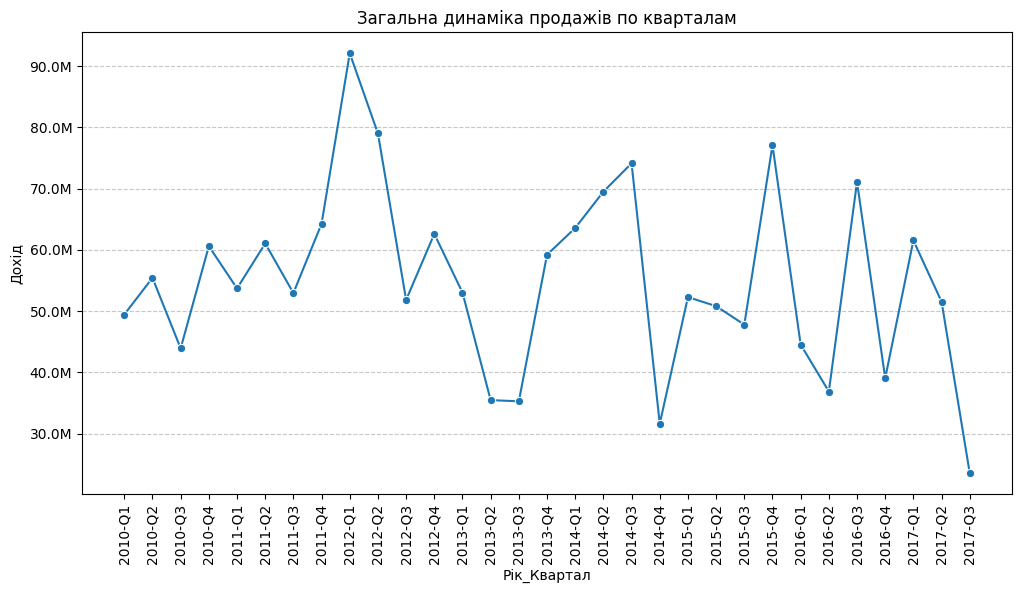

In [129]:
# Загальна динаміка продажів
category_trend = (sales_df
                  .groupby(['YearQuarter'])['Revenue']
                  .sum()
                  .reset_index())

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=category_trend,
             x='YearQuarter', y='Revenue', marker='o')
plt.title('Загальна динаміка продажів по кварталам')
plt.xlabel('Рік_Квартал')
plt.ylabel('Дохід')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()



####*Динаміка продажів у розрізі категорій товарів*

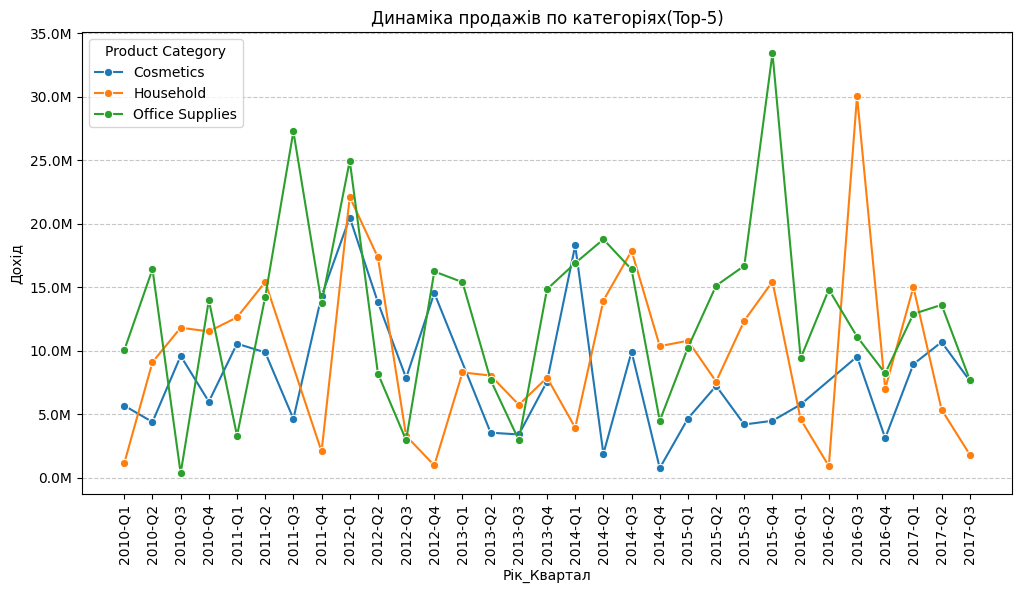

In [130]:
category_trend = (sales_df
                  .groupby(['YearQuarter', 'Product Category'])['Revenue']
                  .sum()
                  .reset_index())

top_category = (sales_df.groupby('Product Category')['Revenue']
                 .sum().nlargest(3).index)

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=category_trend[category_trend['Product Category'].isin(top_category)],
             x='YearQuarter', y='Revenue',
             hue='Product Category', marker='o')
plt.title('Динаміка продажів по категоріях(Top-5)')
plt.xlabel('Рік_Квартал')
plt.ylabel('Дохід')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


####*Динаміка продажів у розрізі країн*

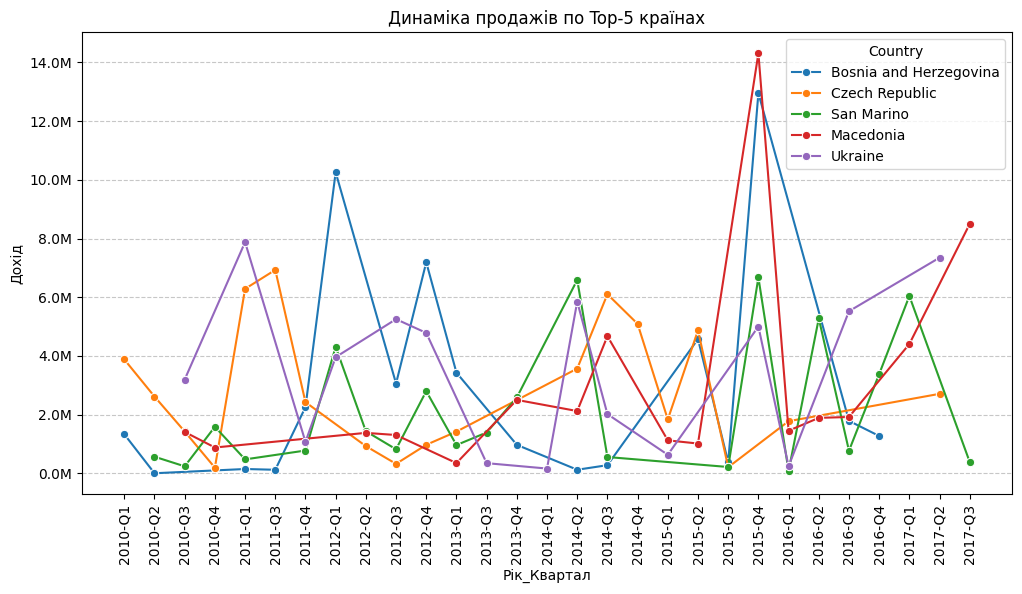

In [131]:
country_trend = (sales_df
                 .groupby(['YearQuarter', 'Country'])['Revenue']
                 .sum()
                 .reset_index())

top_countries = (sales_df[sales_df['Country'] != 'Unknown']
                 .groupby('Country')['Revenue']
                 .sum()
                 .nlargest(5)
                 .index)

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=country_trend[country_trend['Country'].isin(top_countries)],
             x='YearQuarter', y='Revenue',
             hue='Country', marker='o')
plt.title('Динаміка продажів по Top-5 країнах')
plt.xlabel('Рік_Квартал')
plt.ylabel('Дохід')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


####*Динаміка продажів у розрізі регіонів*

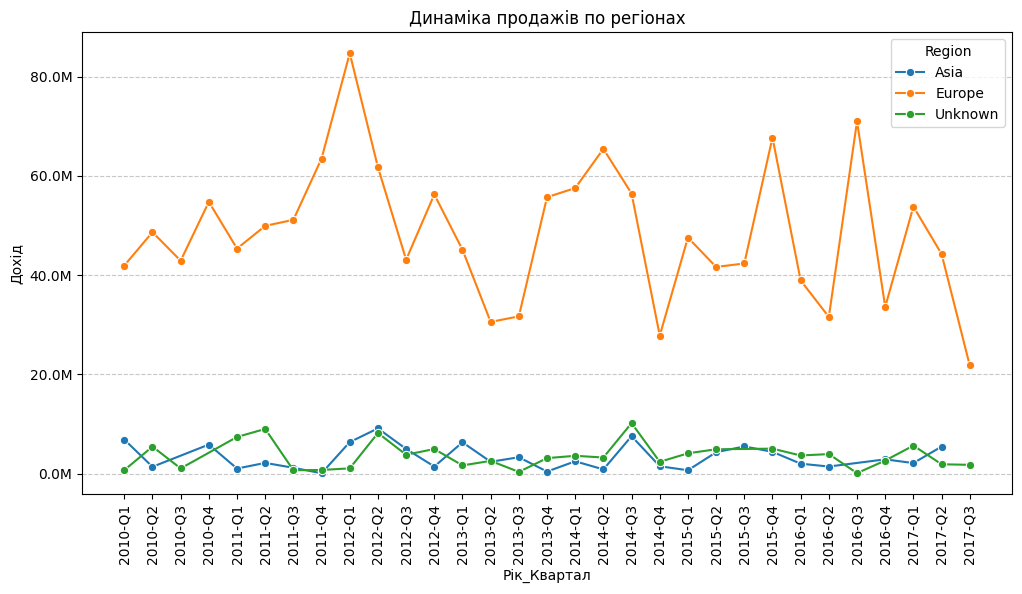

In [132]:
region_trend = (sales_df
                .groupby(['YearQuarter', 'Region'])['Revenue']
                .sum()
                .reset_index())

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=region_trend,
             x='YearQuarter', y='Revenue',
             hue='Region', marker='o')
plt.title('Динаміка продажів по регіонах')
plt.xlabel('Рік_Квартал')
plt.ylabel('Дохід')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


##**Висновки**
***1. Загальна динаміка продажів по кварталах***
- Виручка коливалася від 30M до 90M.
- Є періоди різкого зростання: пік у 2012Q2–2012Q3 понад 90M.
- Далі йде падіння, особливо у 2013Q2–Q3, коли виручка опустилася нижче 40M.
- У 2014–2015 відновлення, але після 2015 року бачимо нестабільність і поступовий спад.

***2. Динаміка продажів по категоріях (ТОП-3)***
- Office Supplies — найбільші коливання, у деякі квартали доходили до 30M+. Має «пікові» продажі, але нестабільні - можливо, продажі залежать від великих одноразових контрактів.
- Household — більш рівномірний тренд, зростання у 2011–2012, далі падіння, потім знову підйоми у 2014–2016.
- Cosmetics — стабільно нижчі за дві інші категорії, але з відносно плавною динамікою.

***3. Динаміка продажів по країнах (ТОП-5)***
- Україна — показує поступове зростання після 2014 року, виходячи у ТОП.
- Боснія і Герцеговина — високі піки у 2012 і 2015 роках, але нестабільно.
- Чехія — стабільні середні продажі без різких провалів.
- Македонія — різкий стрибок у 2015 році (понад 14M), далі нижче.
- Сан-Марино — теж має різкі піки, але не є стабільним драйвером.

***4. Динаміка продажів по регіонах***
- Європа — безумовний лідер, стабільно 40–80M, піки в 2012 і 2016 роках.
- Азія — значно менші обсяги, здебільшого до 5–10M, без явного росту.


###**Аналіз продажів за днями тижня**

In [133]:
sales_df.head(2)

,Order ID,Order Date,Sales Channel,Units Sold,Unit Price,Unit Cost,Revenue,Cost,Profit,Markup,Shipping Time,Order DayName,YearQuarter,Product Category,Country,Region
0,100640618,2014-10-08,Online,650.0,205.7,117.11,133705.0,76121.50,57583.50,75.6,10,Wednesday,2014-Q4,Cereal,Norway,Europe
1,100983083,2016-08-11,Offline,1993.0,205.7,117.11,409960.1,233400.23,176559.87,75.6,0,Thursday,2016-Q3,Cereal,Serbia,Europe


####*Загальний аналіз по дням*

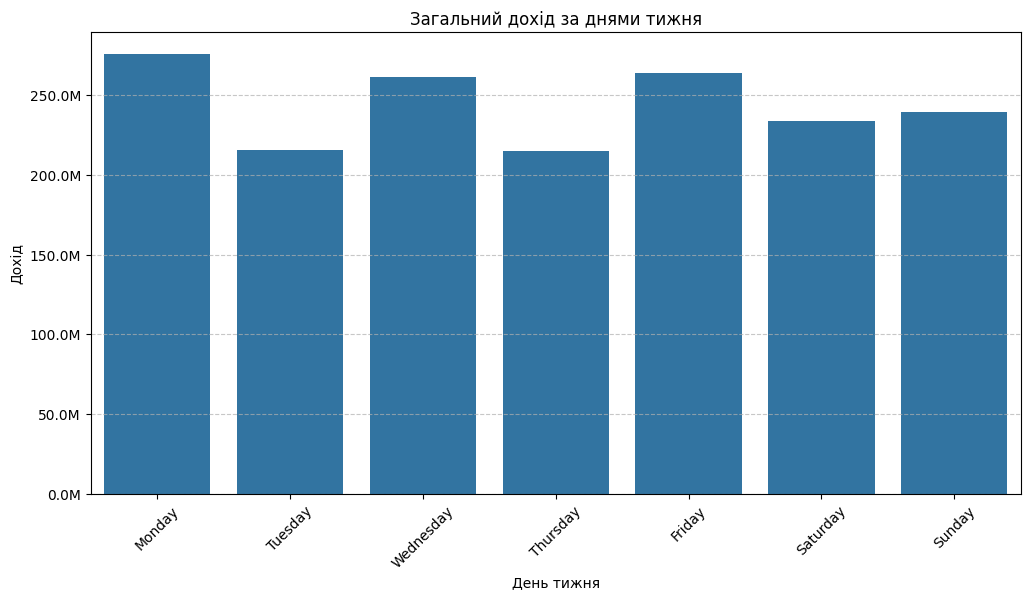

In [134]:
revenue_by_day = sales_df.groupby('Order DayName')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=revenue_by_day.index,
            y=revenue_by_day.values)
plt.title("Загальний дохід за днями тижня")
plt.ylabel("Дохід")
plt.xlabel("День тижня")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


####*Аналіз продажів по дням в розрізі топ 5 категорій*

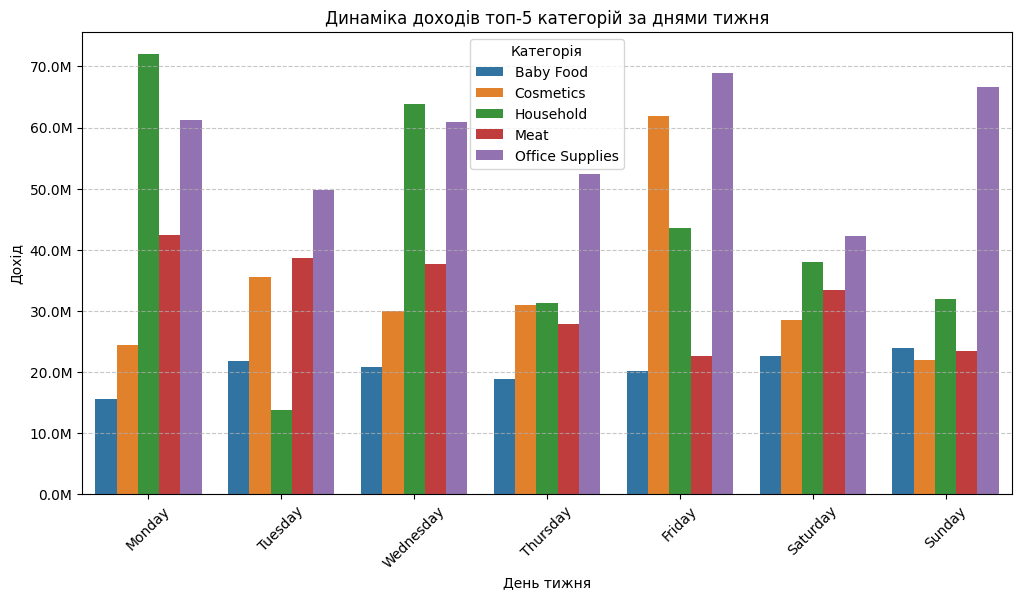

In [135]:

# топ-5 категорій за доходом
top5_categories = (
    sales_df.groupby('Product Category')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# аналіз топ-5 категорій за днями тижня
top5_data = sales_df[sales_df['Product Category'].isin(top5_categories)]

category_day_sales = (
    top5_data.groupby(['Order DayName', 'Product Category'])['Revenue']
    .sum()
    .reset_index()
)

# впорядковуємо дні тижня
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
category_day_sales['Order DayName'] = pd.Categorical(category_day_sales['Order DayName'], categories=day_order, ordered=True)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=category_day_sales,
    x='Order DayName',
    y='Revenue',
    hue='Product Category'
)
plt.title("Динаміка доходів топ-5 категорій за днями тижня")
plt.ylabel("Дохід")
plt.xlabel("День тижня")
plt.legend(title="Категорія")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

##**Висновки**
***1. Загальний дохід за днями тижня***
- Найвищі продажі припадають на понеділок та п’ятницю – обидва дні мають пік доходів понад 260M.
- Субота та неділя – на середньому рівні, близько 235–240M.
- Найслабші дні – вівторок і четвер - біля 215M - можливо, в ці дні варто застосовувати акції чи спеціальні пропозиції для активізації попиту.

***2. Динаміка доходів топ-5 категорій за днями тижня***
- Office Supplies стабільно сильні, особливо у п’ятницю та неділю - понад 65M. Це може свідчити про закупівлі офісів перед вихідними та після.
- Household має яскравий пік у понеділок - 72M, але значно падає у вівторок - 14M. Це дуже виражена сезонність у межах тижня.
- Cosmetics поступово росте, з піком у п’ятницю - 62M. Ймовірно, кінець тижня стимулює покупки для особистих потреб перед вихідними.
- Meat досить рівномірна категорія, але слабка у п’ятницю - 23M, зате краща на початку тижня в понеділок - 42M.
- Baby Food більш стабільна, без сильних стрибків: тримається в діапазоні 15–25M. Це свідчить про постійний попит незалежно від дня.